Python for NLP: Multi-label Text Classification with Keras

Multi-label Text Classification Model with Single Output Layer

https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/ (english)

https://maelfabien.github.io/machinelearning/NLPfr/#7-embedding-par-mot (french - spacy)

Import data and libraries

In [51]:
import pandas as pd

#'Unnamed: 0' 'lemmes' 'pos'
X_train = pd.read_csv("../challenge_dataset/X_train_clean.csv").drop(columns='Unnamed: 0')

#'Id', 'category_1', 'category_2', 'category_3', 'category_4'
Y_train = pd.read_csv("../challenge_dataset/y_train.csv",sep=";").drop(columns="Id")

#'Id ', 'Caption'
X_test = pd.read_csv("../challenge_dataset/X_test.csv",sep=';').drop(columns='Id ')

In [52]:
X_train.head()

,lemmes,pos
0,"['mourir', 'heure', 'plus', 'revoir', 'petit',...","['VERB', 'NOUN', 'ADV', 'VERB', 'ADJ', 'NOUN']"
1,"['maladie', 'conséquence', 'jeune', 'génératio...","['NOUN', 'NOUN', 'ADJ', 'NOUN', 'VERB', 'NOUN'..."
2,"['sortir', 'mal', 'loger']","['VERB', 'ADV', 'VERB']"
3,"['inquiétude', 'santé', 'proche', 'plus', 'fra...","['NOUN', 'ADJ', 'ADJ', 'ADV', 'ADJ', 'NOUN', '..."
4,"['bien', 'entendre', 'contracter', 'maladie']","['ADV', 'VERB', 'VERB', 'NOUN']"


Necessary imports

In [53]:
#pip install tensorflow

from numpy import array
from keras.preprocessing.text import one_hot
from keras.utils.data_utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate

import numpy as np
import re

import matplotlib.pyplot as plt

Shape and header

In [54]:
print(X_train.shape)

X_train.head()

(485, 2)


,lemmes,pos
0,"['mourir', 'heure', 'plus', 'revoir', 'petit',...","['VERB', 'NOUN', 'ADV', 'VERB', 'ADJ', 'NOUN']"
1,"['maladie', 'conséquence', 'jeune', 'génératio...","['NOUN', 'NOUN', 'ADJ', 'NOUN', 'VERB', 'NOUN'..."
2,"['sortir', 'mal', 'loger']","['VERB', 'ADV', 'VERB']"
3,"['inquiétude', 'santé', 'proche', 'plus', 'fra...","['NOUN', 'ADJ', 'ADJ', 'ADV', 'ADJ', 'NOUN', '..."
4,"['bien', 'entendre', 'contracter', 'maladie']","['ADV', 'VERB', 'VERB', 'NOUN']"


Repartition of categories among training dataset

<AxesSubplot: >

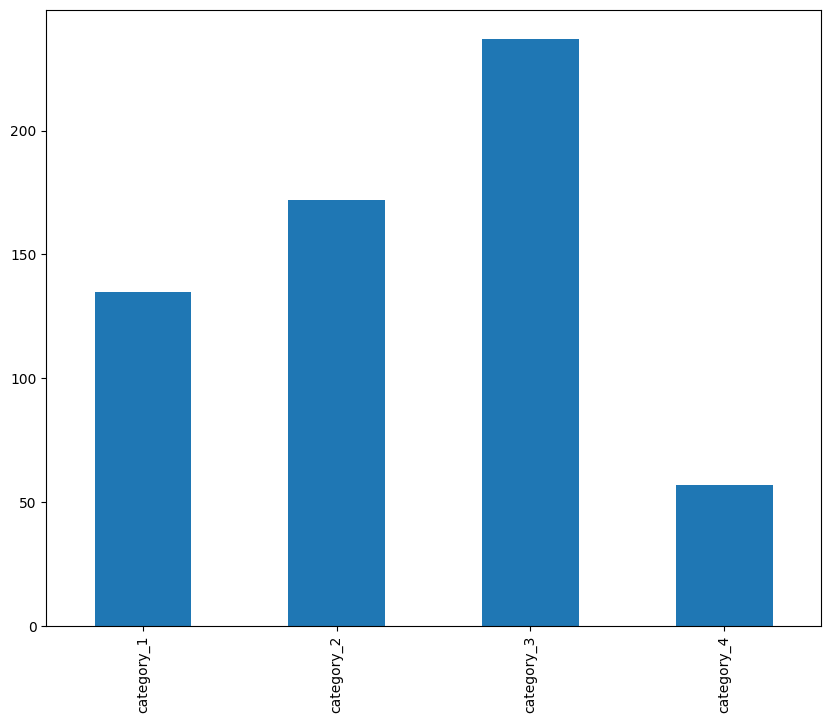

In [55]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Y_train.sum(axis=0).plot.bar()

Creating Multi-label Text Classification Models

Multi-label Text Classification Model with Single Output Layer

Pre-processing text

In [56]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Zéèàùï]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [57]:
X_train_cleaned = []

for sentences in X_train['lemmes']:
    X_train_cleaned.append(preprocess_text(sentences))

print(X_train_cleaned)

[' mourir heure plus revoir petit enfant ', ' maladie conséquence jeune génération voir situation insolite arr vie social actif ', ' sortir mal loger ', ' inquiétude santé proche plus fragile femme battre enfant danger prisonnier sdf crise économique avérer possible crise social suite ', ' bien entendre contracter maladie ', ' multiplication pandémie avenir ', ' nombreux reprise pandémie cours prochain année fermeture pays crise économique touche énorme partie population mondial ', ' effondrement economir ', ' craindre modification nature relation entre personne vers plus égoïsme ', ' incivilité ', ' reprendre plusieurs étape pandémie crise économique social particulier chez plus munir ', ' reanimation ', ' famille toucher microbe vouloir bien mourir place jeune ', ' sortie prudent dég ', ' aspect gravissime maladie chez certain patient notamment chez personne gées la perspective mort pénible étouffement absence vaccin nombreux mois condition vie entraver phénomène contamination entrai

Word embedding

In [35]:
#launch once or relaunch previous cell

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_cleaned)

X_train_cleaned = tokenizer.texts_to_sequences(X_train_cleaned)

#print(X_train_cleaned)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train_cleaned = pad_sequences(X_train_cleaned, padding='post', maxlen=maxlen)

#print(X_train_cleaned)

Training 80% testing 20%

In [36]:
X = X_train_cleaned
Y = Y_train

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#'category_1', 'category_2', 'category_3', 'category_4'
y_train.columns
y_test.columns

(388, 200)
(388, 4)
(97, 200)
(97, 4)


Index(['category_1', 'category_2', 'category_3', 'category_4'], dtype='object')

Creating each output

In [38]:
# First output
y1_train = y_train[['category_1']].values
y1_test =  y_test[['category_1']].values

# Second output
y2_train = y_train[['category_2']].values
y2_test =  y_test[['category_2']].values

# Third output
y3_train = y_train[['category_3']].values
y3_test =  y_test[['category_3']].values

# Fourth output
y4_train = y_train[['category_4']].values
y4_test =  y_test[['category_4']].values

In [39]:
#print(y4_train)
#print(y4_test)

Word embedding (french)

https://www.cs.cmu.edu/~afm/projects/multilingual_embeddings.html

In [40]:
from numpy import array, asarray, zeros

In [41]:
embeddings_dictionary = dict()

glove_file = open('../resources/multilingual_embeddings.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 300))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [42]:
#print(embedding_matrix)

NN model

In [43]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)

#4 labels -> 4 neurons
dense_layer_1 = Dense(4, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Summary of the NN

In [44]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 200, 300)          520500    
                                                                 
 lstm_1 (LSTM)               (None, 128)               219648    
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 740,664
Trainable params: 220,164
Non-trainable params: 520,500
_________________________________________________________________
None


Architecture of the NN

In [45]:
from keras.utils import plot_model

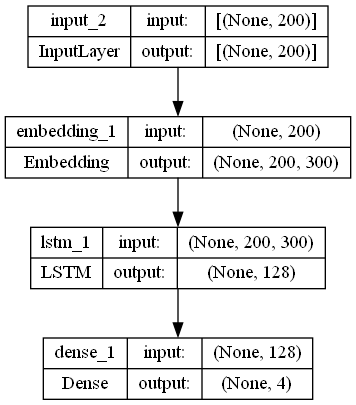

In [46]:
#pip install pydot
#https://graphviz.gitlab.io/download/

plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

Train model

In [47]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
10/10 [==============================] - 5s 281ms/step - loss: 0.6739 - acc: 0.2774 - val_loss: 0.5988 - val_acc: 0.3718
Epoch 2/15
10/10 [==============================] - 2s 194ms/step - loss: 0.5823 - acc: 0.3387 - val_loss: 0.6113 - val_acc: 0.3718
Epoch 3/15
10/10 [==============================] - 2s 187ms/step - loss: 0.5711 - acc: 0.3419 - val_loss: 0.6016 - val_acc: 0.3718
Epoch 4/15
10/10 [==============================] - 2s 184ms/step - loss: 0.5743 - acc: 0.3419 - val_loss: 0.6070 - val_acc: 0.3718
Epoch 5/15
10/10 [==============================] - 2s 178ms/step - loss: 0.5689 - acc: 0.3419 - val_loss: 0.6000 - val_acc: 0.3718
Epoch 6/15
10/10 [==============================] - 2s 192ms/step - loss: 0.5670 - acc: 0.3419 - val_loss: 0.6000 - val_acc: 0.3718
Epoch 7/15
10/10 [==============================] - 2s 187ms/step - loss: 0.5656 - acc: 0.3419 - val_loss: 0.5998 - val_acc: 0.3718
Epoch 8/15
10/10 [==============================] - 2s 181ms/step - loss: 0.

Evaluate model

In [48]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

4/4 [==============================] - 0s 52ms/step - loss: 0.5894 - acc: 0.3196
Test Score: 0.5893532037734985
Test Accuracy: 0.3195876181125641


Graphs of the model

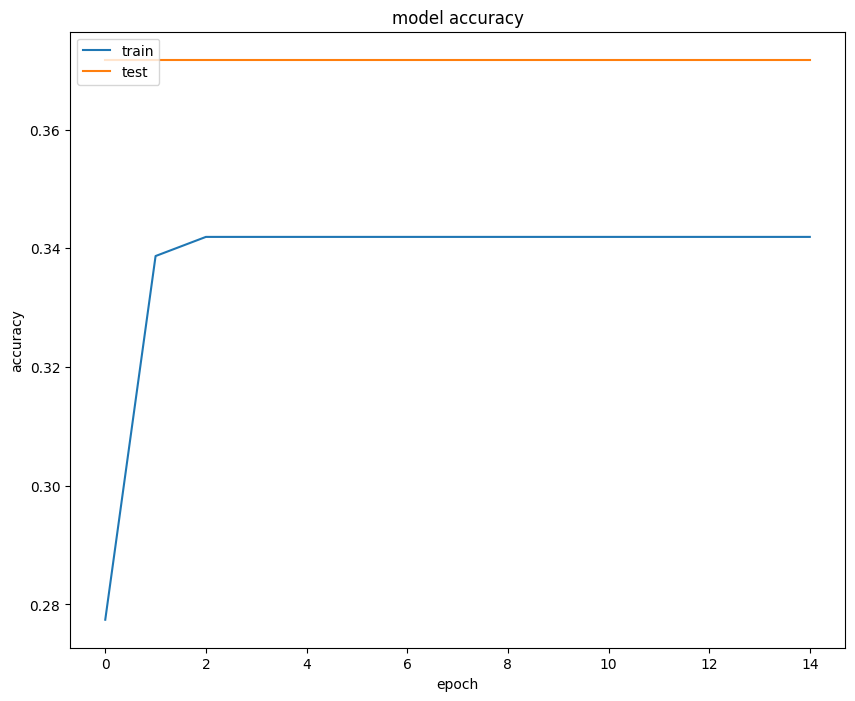

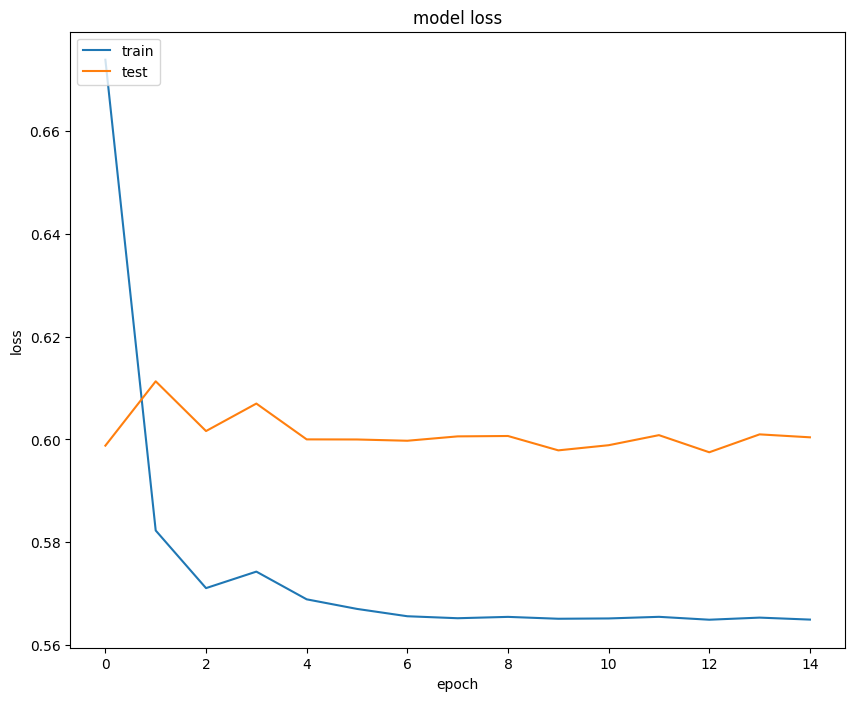

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()